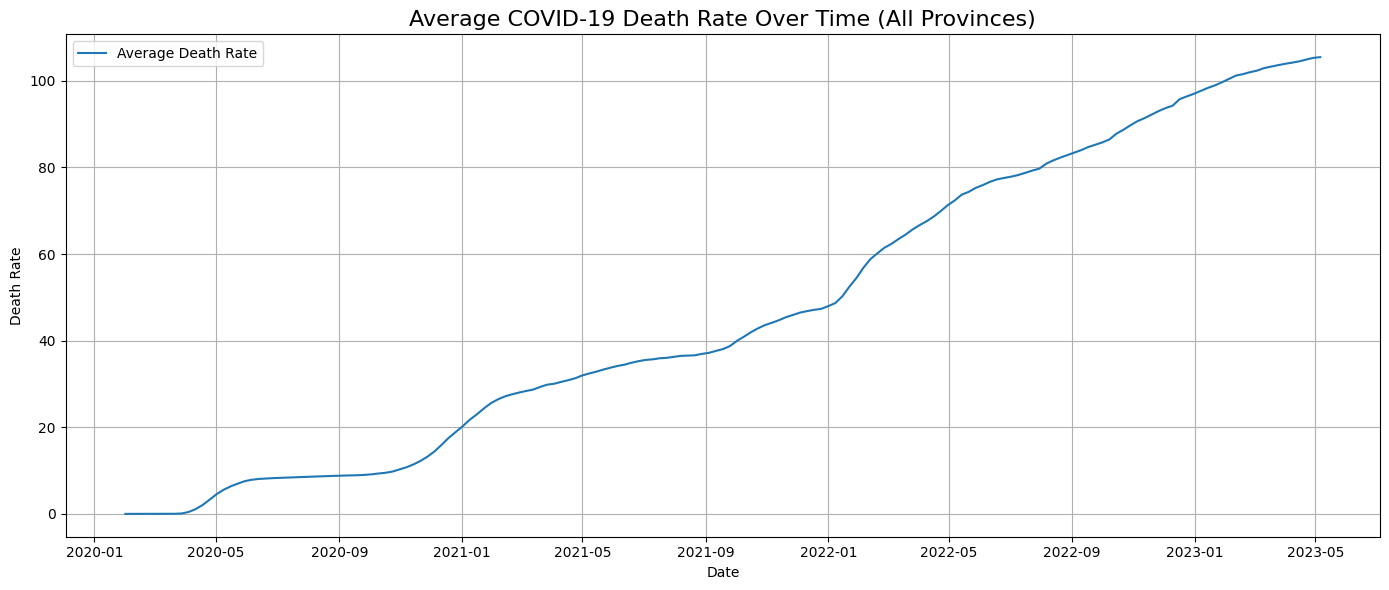

In [5]:
# ================================================================
# COVID-19 Fatality Rate Analysis
# Prepared by: Darrah Borinaga
# Date: March 20, 2025
# Purpose: To test if provincial COVID-19 death rates follow a normal distribution and
#          examine the existence of seasonality trends and stationarity in the data.
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import os

# Load dataset
file_path = r'C:\Users\darbo\OneDrive\Desktop\Dataset_TMU\covid19-dataset (1).csv'
df = pd.read_csv(file_path)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for relevant columns and drop missing values
df_filtered = df[['date', 'prname', 'ratedeaths']].dropna()

# Group by date and calculate average ratedeaths across all provinces
df_avg_ratedeaths = df_filtered.groupby('date')['ratedeaths'].mean()

# =======================
# 1. Line Plot for Trend
# =======================
plt.figure(figsize=(14, 6))
plt.plot(df_avg_ratedeaths.index, df_avg_ratedeaths.values, label='Average Death Rate')
plt.title("Average COVID-19 Death Rate Over Time (All Provinces)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# =======================================
# 2. Seasonal Decomposition (Monthly Avg)


In [ ]:
# =======================================
ts_monthly = df_avg_ratedeaths.resample('M').mean().dropna()
decomposition = seasonal_decompose(ts_monthly, model='additive', period=12)

# Plot seasonal decomposition
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Monthly Average COVID-19 Death Rate", fontsize=16)
plt.tight_layout()
plt.show()

# =============================
# 3. Augmented Dickey-Fuller Test
# =============================
adf_result = adfuller(ts_monthly)

# Display ADF test results
adf_summary = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Critical Values': adf_result[4]
}

print("ADF Test Results:")
for key, value in adf_summary.items():
    print(f"{key}: {value}")


NameError: name 'df_avg_ratedeaths' is not defined